In [2]:
import numpy as np

import pandas as pd

import scipy

import struct 

import wave

import matplotlib.pyplot as plt

### NyQuist Sampling Theorm
The sampling frequency should be at least twice the highest frequency contained in the signal.

\begin{equation} 
f_{s} = 2f_{c}
\end{equation}

In the above equation $f_{s}$ is the sampling frequency (how often samples are taken per unit of time or
space), and $f_{c}$ is the highest frequency contained in the signal.

### Creating a sinsouidal wave
Sum of two sinosouidal waves are taken, both having an amplitude of $1000$ and a frequency of $390Hz$ and $440Hz$
respectively.

In [3]:
#Amplitude of first sine wave
amp1 = 1000

#Amplitude of second sine wave
amp2 = 1000

#Frequency of first sine wave
freq1 = 390

#Frequency of second sine wave
freq2 = 440

#Sampling rate, should be atleast twice the highest frequency (i.e 440Hz see Nyquist-Sampling Theorm)
sampling_rate = 1000

#Datasize
datasize = 200000

#Time array
t = np.linspace(0,datasize/sampling_rate,datasize)

#Generating signal
signal = amp1 * np.sin(freq1 * 2 * np.pi * t) + amp2 * np.sin(freq2 * 2 * np.pi * t)

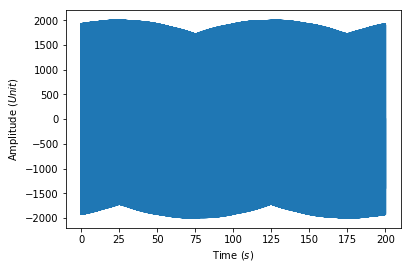

In [8]:
# Plotting the generated signal 
plt.plot(t, signal)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.show()
#plt.savefig('signal.png')

In [4]:
#Creating a wav file for orignal signal
fname = "sound_orignal.wav"
nchannels = 1 # 1 for mono 2 for stereo
sampwidth = 2 # Sampling frequency
framerate = int(sampling_rate)
nframes = datasize
comptype = "NONE"
compname = "not compressed"

wav_file = wave.open(fname, 'w')
wav_file.setparams(
    (nchannels, sampwidth, framerate, nframes, comptype, compname))
for s in signal:
     wav_file.writeframes(struct.pack('h', int(s)))
wav_file.close()

In [5]:
fname = "sound_orignal.wav"

wav_file = wave.open(fname, 'r')
frate = (wav_file.getframerate())
sample_width = (wav_file.getsampwidth())
nchannels = (wav_file.getnchannels())

data = wav_file.readframes(datasize)
wav_file.close()
data = struct.unpack('{n}h'.format(n=datasize), data)
data = np.array(data)

Highest frequency observed is: 440.00000000000006 Hz


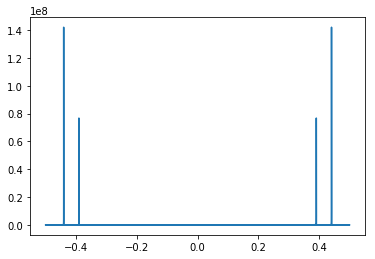

In [6]:
#Applying Fourier transform
w = np.fft.fft(data)
freqs = np.fft.fftfreq(len(w))
#print(freqs.min(), freqs.max()) # Will always be in a range [-0.5 0.5)
plt.plot(freqs,abs(w))

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * frate)
print('Highest frequency observed is:', freq_in_hertz, 'Hz')

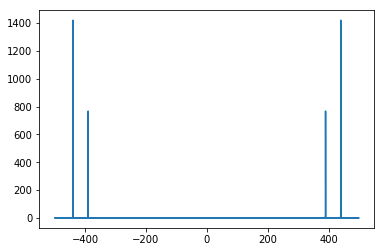

In [7]:
# Frequency on xaxis is not correct since I didn't account for sampling rate
# Correcting frequency and amplitute (see concept of leakage)
new_freqs = freqs * frate
plt.plot(new_freqs, 2 * np.abs(w) / len(np.abs(w)))

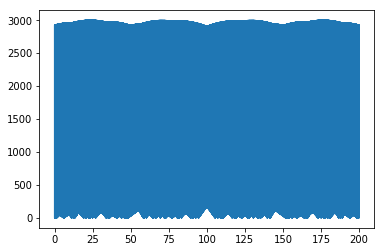

In [8]:
fft = w
below_cutoff = np.abs(fft) < 390
fft[below_cutoff] = 0
cleaner_signal = scipy.ifft(fft)
plt.plot(t, np.abs(cleaner_signal))
plt.savefig('clean.png')

In [9]:
#Creating a wav file for inverse signal
fname = "inverse_fft.wav"
nchannels = 1 # 1 for mono 2 for stereo
sampwidth = 2 # Sampling frequency
framerate = int(sampling_rate)
nframes = datasize
comptype = "NONE"
compname = "not compressed"

wav_file = wave.open(fname, 'w')
wav_file.setparams(
    (nchannels, sampwidth, framerate, nframes, comptype, compname))
for s in np.abs(cleaner_signal):
     wav_file.writeframes(struct.pack('h', int(s)))
wav_file.close()